# Prepare dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import mnist

train_images = mnist.train_images()
test_images = mnist.test_images()
train_labels = mnist.train_labels()
test_labels = mnist.test_labels()

In [3]:
X_train, X_test, y_train, y_test = train_images.reshape(60000, -1), \
                                test_images.reshape(10000, -1), \
                                train_labels, \
                                test_labels

*Suffle index*

In [4]:
import numpy as np
shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Some Classification Algorithms

### One-Vs-One

In [5]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

some_digit = X_train[36000]

ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

45

In [6]:
ovo_clf.predict([some_digit])
y_train[36000]

6

### Random Forest Classification

In [7]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([6], dtype=uint8)

In [8]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

#### Cross val score

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9410118 , 0.93814691, 0.94144122])

### *Scale data*

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.94106179, 0.9380969 , 0.94144122])

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9095181 , 0.91039552, 0.91043657])

## Error Analysis

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

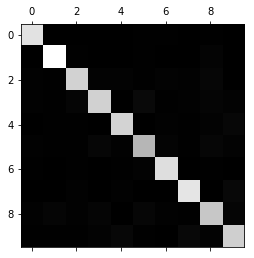

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

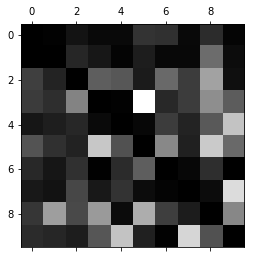

In [14]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## Multioutput Classification

In [19]:
%matplotlib inline
from numpy import random as rnd
import matplotlib.pyplot as plt

noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

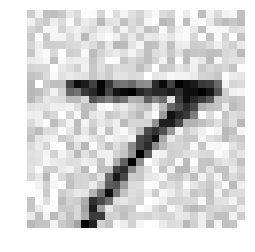

In [21]:
import matplotlib
def plot_digit(digit):
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, \
               cmap=matplotlib.cm.binary, \
               interpolation="nearest")
    plt.axis("off")
    plt.show()

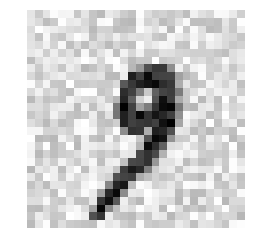

In [26]:
plot_digit(X_test_mod[1000])

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)

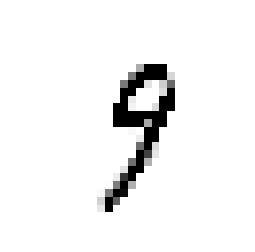

In [25]:
clean_digit = knn_clf.predict([X_test_mod[1000]])
plot_digit(clean_digit)